In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Seyi\Desktop\NYC Accidents 2020.csv')
df.head(50)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
5,2020-08-29,03:29:00,NaN,NaN,40.682310,-73.844950,POINT (-73.84495 40.68231),WOODHAVEN BOULEVARD,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4342721,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
6,2020-08-29,19:30:00,BRONX,10459.0,40.825226,-73.887780,POINT (-73.88778 40.825226),LONGFELLOW AVENUE,EAST 165 STREET,NaN,...,NaN,NaN,NaN,NaN,4343004,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2020-08-29,00:00:00,NaN,NaN,40.800160,-73.935380,POINT (-73.93538 40.80016),2 AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4343342,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-08-29,19:50:00,BRONX,10466.0,40.894314,-73.860270,POINT (-73.86027 40.894314),EAST 233 STREET,CARPENTER AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4343030,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
9,2020-08-29,09:20:00,QUEENS,11385.0,40.706780,-73.908880,POINT (-73.90888 40.70678),NaN,NaN,565 WOODWARD AVENUE,...,NaN,NaN,NaN,NaN,4343040,Sedan,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
dt = df.copy() #made a copy of the dataset

In [206]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70318 entries, 0 to 74880
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Crash_date                     70318 non-null  datetime64[ns]
 1   Crash_time                     70318 non-null  object        
 2   Borough                        70318 non-null  object        
 3   Latitude                       70318 non-null  float64       
 4   Longitude                      68924 non-null  float64       
 5   On_street_name                 51059 non-null  object        
 6   Cross_street_name              33883 non-null  object        
 7   Off_street_name                19259 non-null  object        
 8   Number_of_persons_injured      70318 non-null  int64         
 9   Number_of_persons_killed       70318 non-null  int64         
 10  Number_of_pedestrians_injured  70318 non-null  int64         
 11  Number_of_pedestrian

In [213]:
dt.isnull().sum()

Crash_date                           0
Crash_time                           0
Borough                              0
Latitude                             0
Longitude                         1394
On_street_name                   19259
Cross_street_name                36435
Off_street_name                  51059
Number_of_persons_injured            0
Number_of_persons_killed             0
Number_of_pedestrians_injured        0
Number_of_pedestrians_killed         0
Number_of_cyclist_injured            0
Number_of_cyclist_killed             0
Number_of_motorist_injured           0
Number_of_motorist_killed            0
Contributing_factor_vehicle_1      293
Contributing_factor_vehicle_2    14720
Collision_id                         0
Vehicle_type_code_1                619
Vehicle_type_code_2              20158
dtype: int64

In [208]:
(dt.isnull().sum()/df.shape[0]) * 100


Crash_date                        0.000000
Crash_time                        0.000000
Borough                           0.000000
Latitude                          0.000000
Longitude                         1.861620
On_street_name                   25.719475
Cross_street_name                48.657203
Off_street_name                  68.186856
Number_of_persons_injured         0.000000
Number_of_persons_killed          0.000000
Number_of_pedestrians_injured     0.000000
Number_of_pedestrians_killed      0.000000
Number_of_cyclist_injured         0.000000
Number_of_cyclist_killed          0.000000
Number_of_motorist_injured        0.000000
Number_of_motorist_killed         0.000000
Contributing_factor_vehicle_1     0.391288
Contributing_factor_vehicle_2    19.657857
Collision_id                      0.000000
Vehicle_type_code_1               0.826645
Vehicle_type_code_2              26.920046
dtype: float64

In [9]:
#Columns
dt.columns = dt.columns.str.replace(' ', '_').str.capitalize()
dt.drop(columns = ['Location', 'Zip_code', 'Contributing_factor_vehicle_3', 'Contributing_factor_vehicle_4', 'Contributing_factor_vehicle_5', 'Vehicle_type_code_3', 'Vehicle_type_code_4', 'Vehicle_type_code_5'], inplace = True)

dt.columns

Index(['Crash_date', 'Crash_time', 'Borough', 'Latitude', 'Longitude',
       'On_street_name', 'Cross_street_name', 'Off_street_name',
       'Number_of_persons_injured', 'Number_of_persons_killed',
       'Number_of_pedestrians_injured', 'Number_of_pedestrians_killed',
       'Number_of_cyclist_injured', 'Number_of_cyclist_killed',
       'Number_of_motorist_injured', 'Number_of_motorist_killed',
       'Contributing_factor_vehicle_1', 'Contributing_factor_vehicle_2',
       'Collision_id', 'Vehicle_type_code_1', 'Vehicle_type_code_2'],
      dtype='object')

In [10]:
#Crash date
dt.Crash_date = dt['Crash_date'].astype('datetime64[ns]')
dt.Crash_date.info()
dt['Borough'] = dt['Borough'].str.capitalize()

<class 'pandas.core.series.Series'>
RangeIndex: 74881 entries, 0 to 74880
Series name: Crash_date
Non-Null Count  Dtype         
--------------  -----         
74881 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 585.1 KB


In [63]:
#LATITUDE
#checking the range of latitude, zip code and longitude for each borough
#dt[dt['Borough'] == 'Brooklyn'][['Latitude', 'Longitude', 'Zip_code']].describe() 
#dt[dt['Borough'] == 'Bronx'][['Latitude', 'Longitude', 'Zip_code']].describe()
#dt[dt['Borough'] == 'Manhattan'][['Latitude', 'Longitude', 'Zip_code']].describe()
#dt[dt['Borough'] == 'Queens'][['Latitude', 'Longitude', 'Zip_code']].describe()
#dt[dt['Borough'] == 'Staten island'][['Latitude', 'Longitude', 'Zip_code']].describe()
#MINIMUM AND MAXIMUM VALUES
#brooklyn lat(0, 40.821205) lon(-74.040820, 0) zip(11201, 11421)
#bronx lat(0, 40.912884) lon(-73.931610, 0) zip(10451, 10475)
#manhattan lat(0, 40.873020	) lon(-74.017890, 0) zip(10000, 10282)
#queens lat(0, 40.797800) lon(-73.958630, 0), zip(11001, 11697.)
#staten lat(0, 40.648228) lon(74.249760, 0) zip(10301, 10314)

#HANDLING OUTLIERS IN LATITUDE COLUMN
#replaced the 0.0 latitude value which is an outlier with the median latitude for each borough
#BROOKLYN
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Brooklyn')]['Latitude'].count() #count of 0 values in the latitude column of brooklyn borough
lat_brk_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Brooklyn')]['Latitude'].index
dt.loc[lat_brk_ind, 'Latitude'] = dt.loc[lat_brk_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Brooklyn']['Latitude'].median())
dt[(dt['Borough'] == 'Brooklyn')]['Latitude'].describe()
#BRONX
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Bronx')]['Latitude'].count()
lat_brx_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Bronx')]['Latitude'].index
dt.loc[lat_brx_ind, 'Latitude'] = dt.loc[lat_brx_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Bronx']['Latitude'].median())
dt[(dt['Borough'] == 'Bronx')]['Latitude'].describe()
#MANHATTAN
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Manhattan')]['Latitude'].count()
lat_man_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Manhattan')]['Latitude'].index
dt.loc[lat_man_ind, 'Latitude'] = dt.loc[lat_man_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Manhattan']['Latitude'].median())
dt[(dt['Borough'] == 'Manhattan')]['Latitude'].describe()
#QUEENS
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Queens')]['Latitude'].count()
lat_que_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Queens')]['Latitude'].index
dt.loc[lat_que_ind, 'Latitude'] = dt.loc[lat_que_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Queens']['Latitude'].median())
dt[(dt['Borough'] == 'Queens')]['Latitude'].describe()
#STATEN ISLAND
dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Staten island')]['Latitude'].count()
lat_sti_ind = dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Staten island')]['Latitude'].index
dt.loc[lat_sti_ind, 'Latitude'] = dt.loc[lat_sti_ind, 'Latitude'].replace(0.0, dt[dt['Borough'] == 'Staten island']['Latitude'].median())
dt[(dt['Borough'] == 'Staten island')]['Latitude'].describe()

#Dropped columns with null values across borough, zip code and latitude with 0.0 value and also null values
drz = dt[(dt['Borough'].isnull()) & (dt['Latitude'] == 0)].index
dt.drop(index = drz, axis = 0, inplace = True)
drp = dt[(dt['Borough'].isnull()) & (dt['Latitude'].isnull())].index
dt.drop(index = drp, axis = 0, inplace = True)

#Replacing null latitude values for each borough with the median value of the latitude
#BROOKLYN
lat_ind = dt[(dt['Borough'] == 'Brooklyn') & dt['Latitude'].isnull()].index
dt.loc[lat_ind, 'Latitude'] = dt.loc[lat_ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Brooklyn']['Latitude'].median())
dt[(dt['Borough'] == 'Brooklyn') & dt['Latitude'].isnull()]['Latitude'].isnull().sum()

#QUEENS
ind = dt[(dt['Borough'] == 'Queens') & (dt['Latitude'].isnull())]['Borough'].index
dt.loc[ind, 'Latitude'] = dt.loc[ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Queens']['Latitude'].median())
dt[dt['Borough'] == 'Queens']['Latitude'].isnull().sum()

#MANHATTAN
ind = dt[(dt['Borough'] == 'Manhattan') & (dt['Latitude'].isnull())]['Borough'].index
dt.loc[ind, 'Latitude'] = dt.loc[ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Manhattan']['Latitude'].median())
dt[dt['Borough'] == 'Manhattan']['Latitude'].isnull().sum()

#STATEN ISLAND
ind = dt[(dt['Borough'] == 'Staten island') & (dt['Latitude'].isnull())]['Borough'].index
dt.loc[ind, 'Latitude'] = dt.loc[ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Staten island']['Latitude'].median())
dt[dt['Borough'] == 'Staten island']['Latitude'].isnull().sum()

0

In [12]:
lat_ind = dt[(dt['Borough'] == 'Bronx') & dt['Latitude'].isnull()].index
dt.loc[lat_ind, 'Latitude'] = dt.loc[lat_ind, 'Latitude'].fillna(dt[dt['Borough'] == 'Bronx']['Latitude'].median())
dt[(dt['Borough'] == 'Brooklyn') & dt['Latitude'].isnull()]['Latitude'].isnull().sum()

0

In [26]:
#dt[dt['Borough'] == 'Brooklyn']['Latitude'].max()
#dt[(dt['Latitude'] == 0) & (dt['Borough'] == 'Brooklyn')].index
#dt[(dt['Borough'] == 'Staten island')]['Latitude'].plot(kind = 'box')
dt[dt['Borough'] == 'Staten island']['Latitude'].describe()

count    1395.000000
mean       40.593317
std         0.036709
min        40.504482
25%        40.562697
50%        40.600180
75%        40.624952
max        40.648228
Name: Latitude, dtype: float64

In [185]:
#BOROUGH
#dt['Borough'] = dt['Borough'].str.capitalize()
#filling the nulls in the borough column with the most occuring borough of each latitude range
md = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Brooklyn']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Brooklyn']['Latitude'].max())]['Borough'].mode()[0]
db = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Brooklyn']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Brooklyn']['Latitude'].max())]
ind = db[db['Borough'].isnull()].index
ind
dt.loc[ind, 'Borough'] = dt.loc[ind, 'Borough'].fillna(md)

val_brx = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Bronx']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Bronx']['Latitude'].max())]['Borough'].value_counts(dropna = False)
md_brx = dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Bronx']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Bronx']['Latitude'].max())]['Borough'].mode()[0]
dbrx = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Bronx']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Bronx']['Latitude'].max())]
dbrx_ind = dbrx[dbrx['Borough'].isnull()].index
dt.loc[dbrx_ind, 'Borough'] = dt.loc[dbrx_ind, 'Borough'].fillna(md_brx)

#dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Queens']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Queens']['Latitude'].max())]['Borough'].value_counts(dropna = False)
md_que = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Queens']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Queens']['Latitude'].max())]['Borough'].mode()[0]
db_que = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Queens']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Queens']['Latitude'].max())]
que_ind = db_que[db_que['Borough'].isnull()].index
que_ind
dt.loc[que_ind, 'Borough'] = dt.loc[que_ind, 'Borough'].fillna(md_que)

dt[(dt['Latitude'] >= dt[dt['Borough'] == 'Staten island']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Staten island']['Latitude'].max())]['Borough'].value_counts(dropna = False)
md_sti = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Staten island']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Staten island']['Latitude'].max())]['Borough'].mode()[0]
db_sti = dt[(dt['Latitude'] >=  dt[dt['Borough'] == 'Staten island']['Latitude'].min()) & (dt['Latitude'] <= dt[dt['Borough'] == 'Staten island']['Latitude'].max())]
sti_ind = db_sti[db_sti['Borough'].isnull()].index
sti_ind
dt.loc[sti_ind, 'Borough'] = dt.loc[sti_ind, 'Borough'].fillna(md_sti)

#this falls outside the latitude ranges of each borough 
nll = dt[dt['Borough'].isnull()].index
dt.loc[nll, 'Borough'] = dt.loc[nll, 'Borough'].fillna('Unknown')

In [217]:
dt[dt['Longitude'].isnull()]

,Crash_date,Crash_time,Borough,Latitude,Longitude,On_street_name,Cross_street_name,Off_street_name,Number_of_persons_injured,Number_of_persons_killed,Number_of_pedestrians_injured,Number_of_pedestrians_killed,Number_of_cyclist_injured,Number_of_cyclist_killed,Number_of_motorist_injured,Number_of_motorist_killed,Contributing_factor_vehicle_1,Contributing_factor_vehicle_2,Collision_id,Vehicle_type_code_1,Vehicle_type_code_2
166,2020-08-29,06:35:00,Manhattan,40.761550,NaN,NaN,NaN,706 Joe DiMaggio Hwy,1,0,0,0,0,0,1,0,Reaction to Uninvolved Vehicle,Unspecified,4343318,Sedan,Sedan
301,2020-08-28,21:20:00,Queens,40.715706,NaN,VANDERVEER STREET,JAMAICA AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,4342651,Station Wagon/Sport Utility Vehicle,NaN
327,2020-08-28,18:35:00,Queens,40.715706,NaN,NaN,NaN,6408 cooper avenue,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,4342915,Station Wagon/Sport Utility Vehicle,Box Truck
349,2020-08-28,12:30:00,Bronx,40.844177,NaN,NaN,NaN,350 Marconi Street,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4342688,Sedan,NaN
350,2020-08-28,13:15:00,Bronx,40.844177,NaN,GRAND CONCOURSE,EAST 149 STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4343128,Station Wagon/Sport Utility Vehicle,Pick-up Truck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74756,2020-01-01,18:25:00,Brooklyn,40.656610,NaN,Pulaski street,Malcolm x blvd,NaN,0,0,0,0,0,0,0,0,View Obstructed/Limited,Unspecified,4271964,Sedan,Station Wagon/Sport Utility Vehicle
74782,2020-01-01,13:39:00,Brooklyn,40.656610,NaN,bay ridge pkwy,18 avenue,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,NaN,4267649,Box Truck,NaN
74786,2020-01-01,22:59:00,Bronx,40.844177,NaN,broadway,260 street,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,4268941,NaN,NaN
74802,2020-01-01,12:15:00,Manhattan,40.761550,NaN,2 AVENUE,43 STREET,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,4267678,Taxi,Station Wagon/Sport Utility Vehicle


<Axes: >

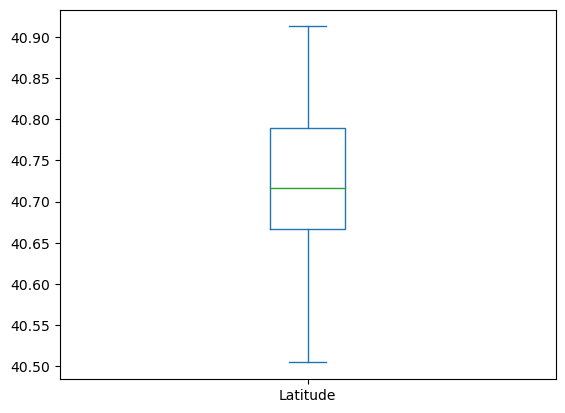

In [181]:
dt['Latitude'].plot.box()